# Imports et lecture des données

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mplfinance as mpl
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Lecture des données

In [2]:
data_folder = "../data"

In [3]:
stock_name = "AAPL"

In [4]:
df = pd.read_csv(f"{data_folder}/{stock_name}.csv", parse_dates=["Date"], index_col="Date")
print(f"{df.shape = }")

df.shape = (756, 6)


In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=756, freq=None)

# Analyse exploratoire

## Affichage des données

### Line plot

<Axes: xlabel='Date'>

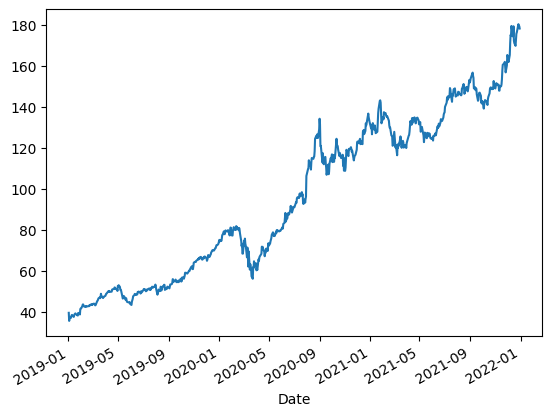

In [7]:
df["Close"].plot()

### Candlestick chart (graphique en bougie

In [8]:
df_3_mois = df[df.index < pd.Timestamp("2019-03-01")]

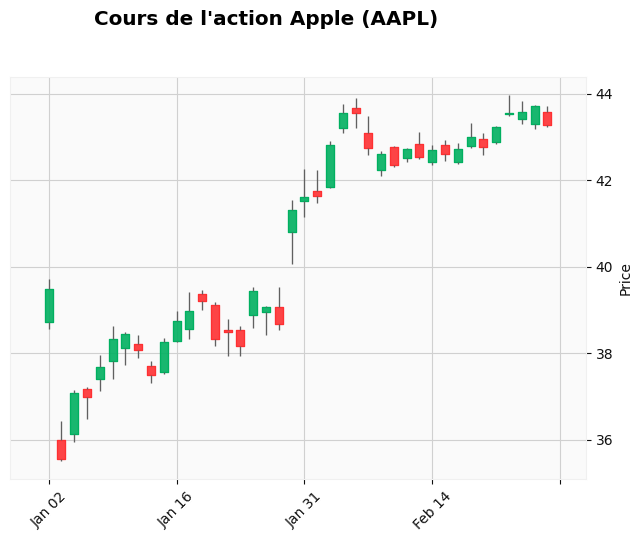

In [9]:
mpl.plot(
    df_3_mois,
    type="candle",
    title=f"Cours de l'action Apple (AAPL)",
    style="yahoo"
)

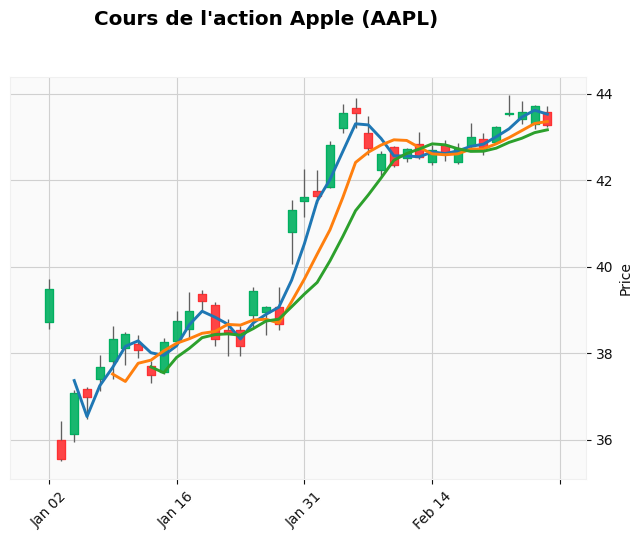

In [10]:
mpl.plot(
    df_3_mois,
    type="candle",
    mav=(3, 6, 9),
    title=f"Cours de l'action Apple (AAPL)",
    style="yahoo"
)

## Auto-corrélation (ACF et PACF)

### Auto-corrélation (ACF)

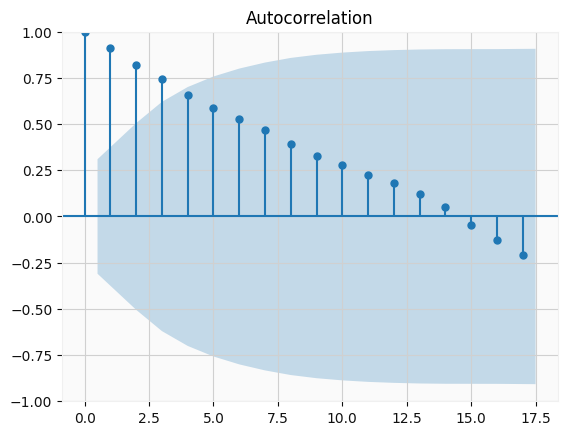

In [11]:
_ = plot_acf(df_3_mois["Close"])

### Auto-corrélation partielle (PACF)

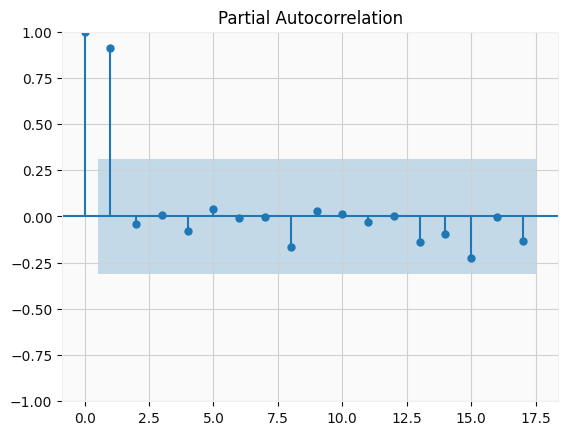

In [12]:
_ = plot_pacf(df_3_mois["Close"])

## Lag plot

<Axes: title={'center': 'Lag plot (lag = 1)'}, xlabel='y(t)', ylabel='y(t + 1)'>

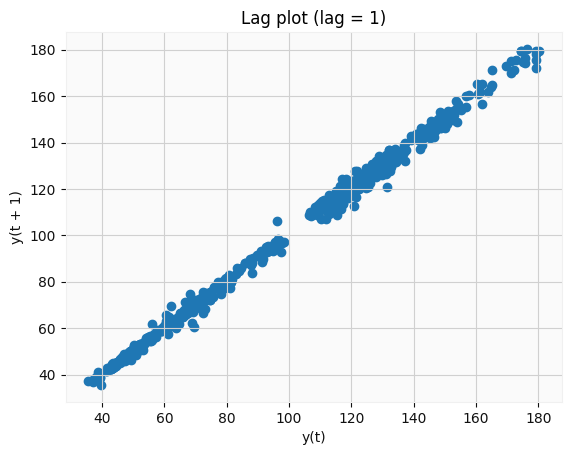

In [13]:
lag = 1
plt.title(f"Lag plot ({lag = })")
pd.plotting.lag_plot(df["Close"], lag=lag)

<Axes: title={'center': 'Lag plot (lag = 10)'}, xlabel='y(t)', ylabel='y(t + 10)'>

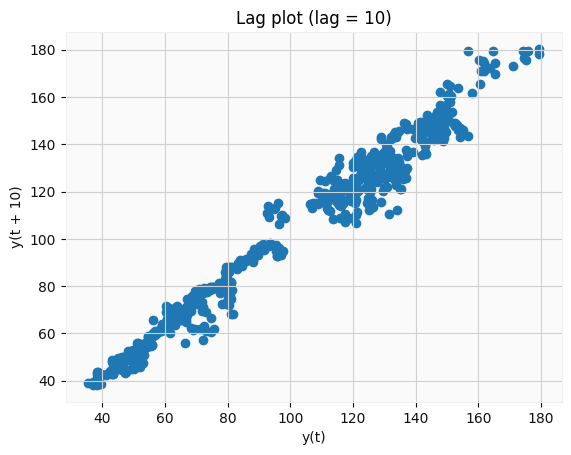

In [14]:
lag = 10
plt.title(f"Lag plot ({lag = })")
pd.plotting.lag_plot(df["Close"], lag=lag)